# Predicting Adult Income Levels: A Machine Learning Perspective

# Import the Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go 

from scipy import stats
from scipy.stats.mstats import winsorize

plt.rcParams["figure.figsize"] = (10, 6)  
import warnings
warnings.filterwarnings('ignore') 

In [ ]:

/kaggle/input/adult-income-dataset/adult.csv

# Load the Dataset

In [38]:
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#Quick overview of the data and its structure as shown above

# Concise Summary of The DataFrame's Structure and Information

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Check Shape of The Dataset for Dimensions and Structure. (Number of Rows And Number of Columns)

In [40]:
df.shape

(48842, 15)

# Transposed Summary of the Numerical Columns in The DataFrame

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


# Summary of the Categorical Columns in The DataFrame

In [42]:
df.describe(include="object").T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


# Check for Duplicates

In [43]:
df.duplicated().sum()

52

In [44]:
df[df.duplicated()]

# When we look at the duplicated ones, we see that there are no duplicates.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


# Check for Missing Values

In [46]:
missing_count = df.isnull().sum()  # df.isna().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


In [ ]:
# There are no missing values

Series([], dtype: int64)


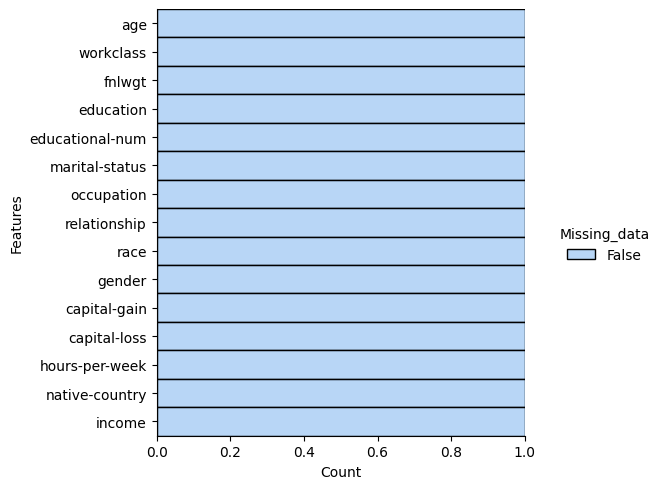

In [47]:
# Graph showing missing data rates:

def na_ratio_plot(df=df):

    sns.displot(df.isna().melt(value_name='Missing_data', var_name='Features'), 
                y='Features', 
                hue='Missing_data', 
                multiple='fill', 
                aspect=9/8,
                palette="pastel") 

print(df.isna().sum()[df.isna().sum() > 0])
na_ratio_plot()

In [48]:
df.select_dtypes(include= "object")

# Some values have "?" punctuation marks, we need to fix them.

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [49]:
df.select_dtypes(include= "object").describe().T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


In [50]:
df.isin(["?"]).sum()

# I looked at which features had "?"

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

# Analyzing the Work class column
The workclass column categorizes individuals based on their employment status. 
Private: The most common category, indicating a large number of individuals employed in private sector jobs.
Self-emp-not-inc: Self-employed individuals not incorporated.
Local-gov: Individuals working for local government.

In [51]:
df["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [53]:
df.workclass = df.workclass.replace("?", "Private")

# I changed the "?" in the workclass column to "Private".

# Analyzing the Occupation column
The occupation column categorizes individuals based on their occupation. 
As I've observed, the "Prof-specialty" occupation is the most frequent, followed by "Craft-repair" and "Exec-managerial".

In [54]:
df["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [55]:
df.occupation.replace(to_replace='?',value=np.nan,inplace=True)
df['occupation'] = df['occupation'].fillna(method='bfill') 

# I changed the "?" in the occupation column to "bfill".

By replacing missing values in the occupation column with the method bfill, I've opted to fill missing values with the value from the next row. This approach can be useful when there's a logical sequence 

In [56]:
df["occupation"].value_counts()

occupation
Prof-specialty       6575
Craft-repair         6471
Exec-managerial      6435
Adm-clerical         5960
Sales                5840
Other-service        5215
Machine-op-inspct    3206
Transport-moving     2495
Handlers-cleaners    2203
Farming-fishing      1604
Tech-support         1527
Protective-serv      1040
Priv-house-serv       256
Armed-Forces           15
Name: count, dtype: int64

# Analyzing the native-country Column
Understanding the Distribution:

The native-country column provides information about the country of origin of individuals. As you can see, the majority of individuals in the dataset are from the United States. However, there's a significant number of individuals from various other countries, including Mexico, Philippines, Germany, and Canada.

In [57]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [58]:
#df['native.country'] = df['native.country'].fillna('United-States')
df['native-country'] = df['native-country'].replace("?", "United-States")

# I changed the "?" in the occunative.countrypation column to "United-States".

In [59]:
df.isin(["?"]).sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Age Data Analysis

In [62]:
def draw_distplot(column, title=""):
    
    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0.9, 0.9, 0.9))  
    sns.set_palette("pastel")
    
 
    sns.distplot(column, color='skyblue')  
    
    mean_value = column.mean()
    plt.axvline(mean_value, color='salmon', linewidth=1.5, label="mean")  
    
   
    median_value = column.median()
    plt.axvline(median_value, color='yellow', linewidth=1.5, label="median") 
    
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title, fontsize=18)
    plt.show()

# Histogram for Age

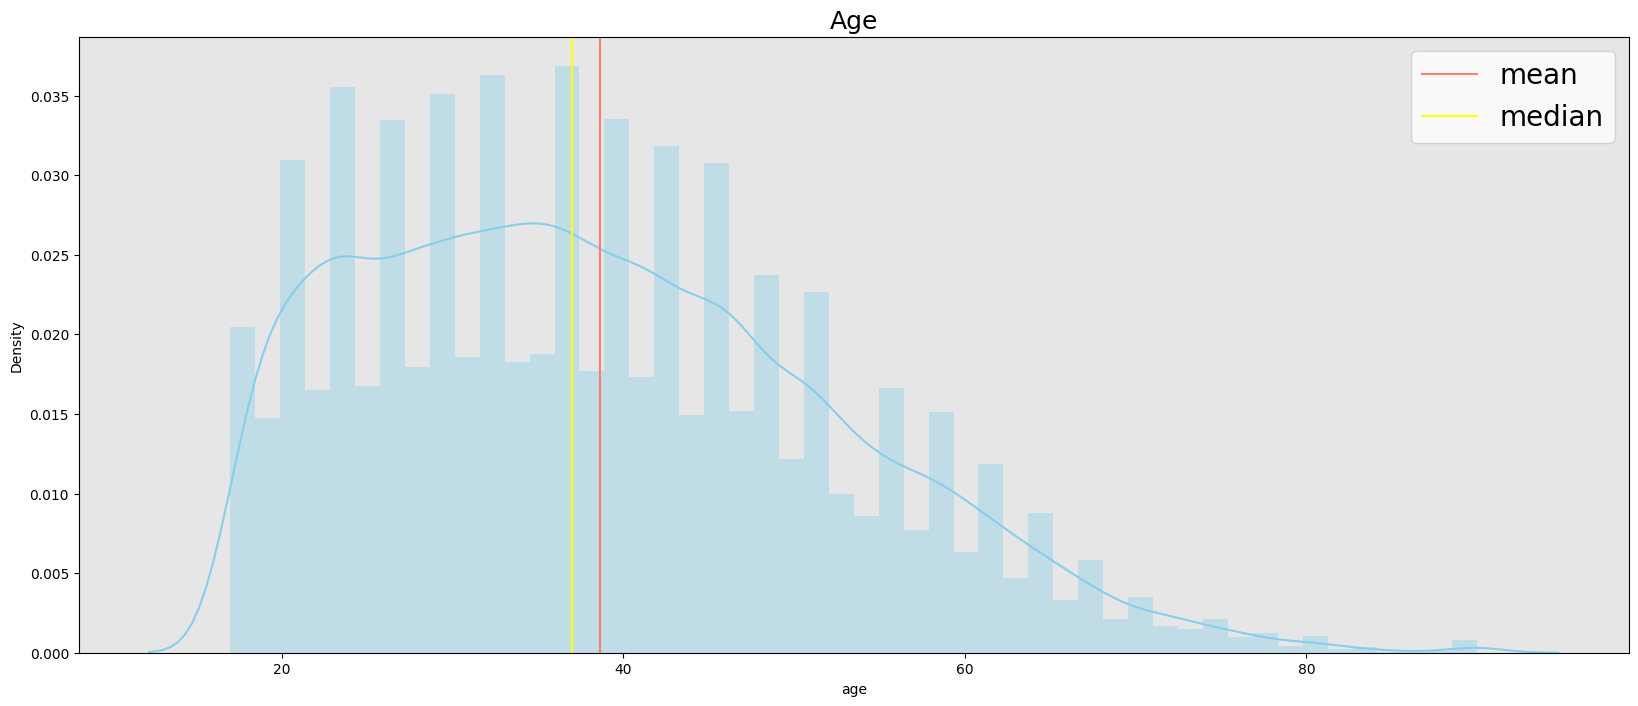

In [63]:
draw_distplot(column=df['age'], title="Age")

# Analyzing the Age Distribution: A Combined Approach

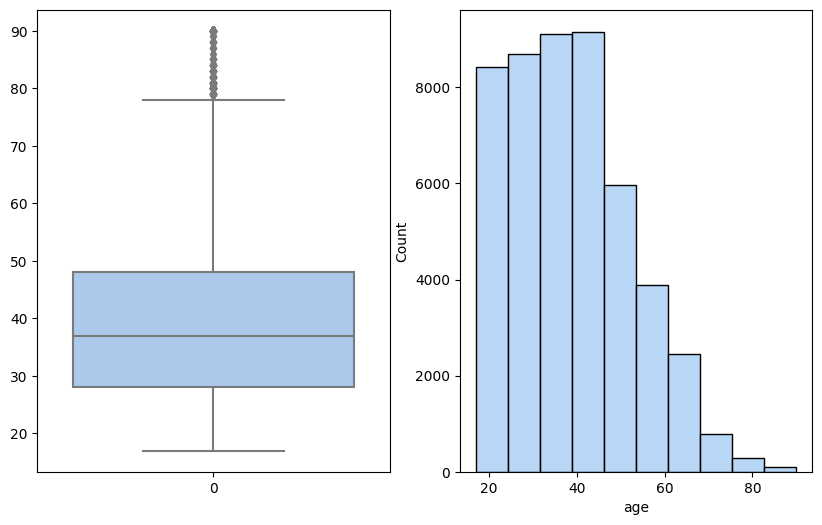

In [64]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df.age,whis=1.5) 
plt.subplot(1,2,2)                                 
sns.histplot(data=df.age,bins= 10);

# Filtered Dataset for Age Column

#To filter the DataFrame to include only those rows where the age exceeds 78.

In [65]:
df[df.age > 78]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
193,79,Private,48574,7th-8th,4,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
234,80,Self-emp-not-inc,201092,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,30,United-States,<=50K
899,90,Private,149069,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K
926,79,Private,27457,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,23,United-States,<=50K
951,80,Private,138050,HS-grad,9,Married-spouse-absent,Machine-op-inspct,Not-in-family,White,Female,0,0,16,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48558,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
48648,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K
48740,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
48775,82,Private,403910,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,3,United-States,<=50K


# Work Class Data Analysis

A countplot is a powerful visualization tool used to represent the frequency distribution of categorical variables. The countplot effectively visualizes the distribution of individuals across different workclasses and income levels. It helps us understand:

Dominant Workclass: The "Private" workclass is the most common.
Income Distribution: The distribution of individuals earning more than or less than $50K across different workclasses.
Potential Biases: If certain workclasses are heavily skewed towards one income level, it might indicate potential biases in the data.

In [67]:
def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
   
    fig = plt.figure(figsize=(figsize_a, figsize_b))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0.9, 0.9, 0.9))  

   
    sns.set_palette("pastel")
    
   
    sns.countplot(x=countplot_x, hue=countplot_hue, data=countplot_data)
    
    
    plt.xticks(rotation=xticks_rotation)
    plt.rc('xtick', labelsize=8)
    plt.legend(prop={'size': 20})
    plt.show()

# Count Plot for Work Class

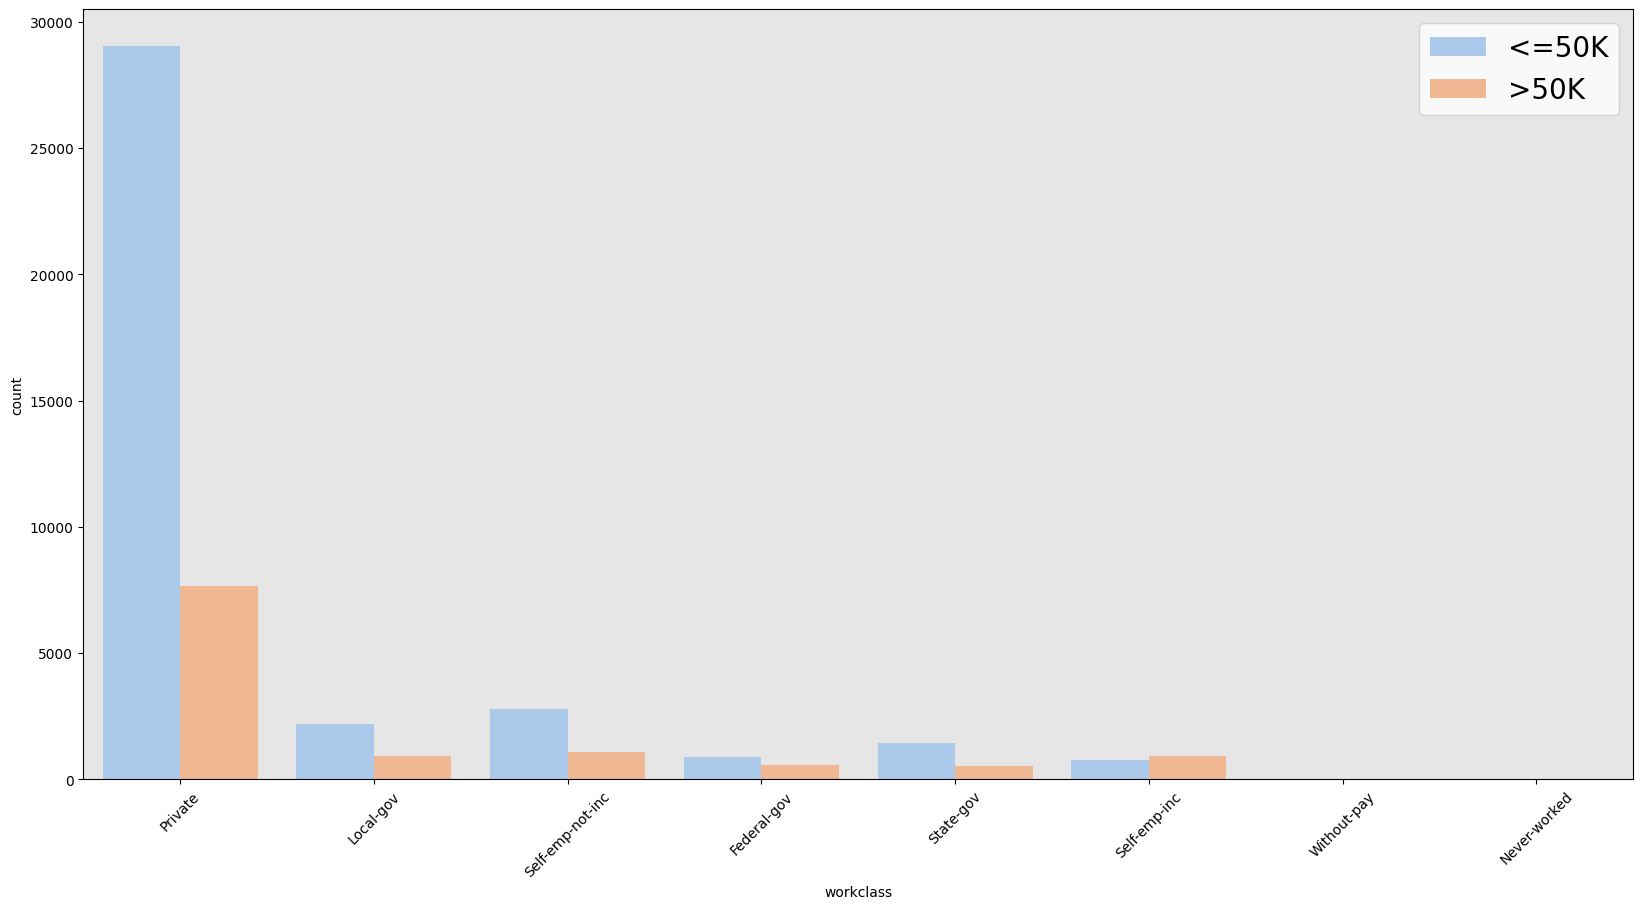

In [68]:
draw_countplot(countplot_x='workclass', countplot_hue='income', countplot_data=df)

#The "Private" workclass has the highest number of individuals, 
#followed by "Self-emp-not-inc" and "Local-gov".
#The two values Without-pay and Never-worked are insignificant and I can drop them.

#FNLWGT - Final weight Distribution

#I can delete this column

df.drop(['fnlwgt'], axis = 1, inplace = True)

# Education and Education.NUM Distribution

In [69]:
df.sample(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33750,31,Private,309974,Some-college,10,Separated,Tech-support,Unmarried,Black,Female,0,0,40,United-States,<=50K
41714,24,Private,254293,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,2174,0,45,United-States,<=50K
40210,25,Private,248990,1st-4th,2,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,24,Mexico,<=50K


In [70]:
df.education.value_counts

<bound method IndexOpsMixin.value_counts of 0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object>

In [ ]:
df.drop(['education'], axis = 1, inplace = True)

In [71]:
# Similar columns, we need to remove one of them

df.groupby("education")["educational-num"].value_counts(dropna=False)

education     educational-num
10th          6                   1389
11th          7                   1812
12th          8                    657
1st-4th       2                    247
5th-6th       3                    509
7th-8th       4                    955
9th           5                    756
Assoc-acdm    12                  1601
Assoc-voc     11                  2061
Bachelors     13                  8025
Doctorate     16                   594
HS-grad       9                  15784
Masters       14                  2657
Preschool     1                     83
Prof-school   15                   834
Some-college  10                 10878
Name: count, dtype: int64

In [72]:
df['educational-num'].value_counts()

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

The data suggests a strong correlation between education level and the number of years spent in education.

"HS-grad" (High School graduate) is the most common education level, followed by "Some-college"

# Marital Status Data Analysis

The marital-status column provides information about the marital status of individuals. The most common status is "Married-civ-spouse," indicating a significant number of married individuals in the dataset.

In [73]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

# Occupation Data Analysis

The plot reveals that "Prof-specialty" and "Craft-repair" are the most common occupations in the dataset.

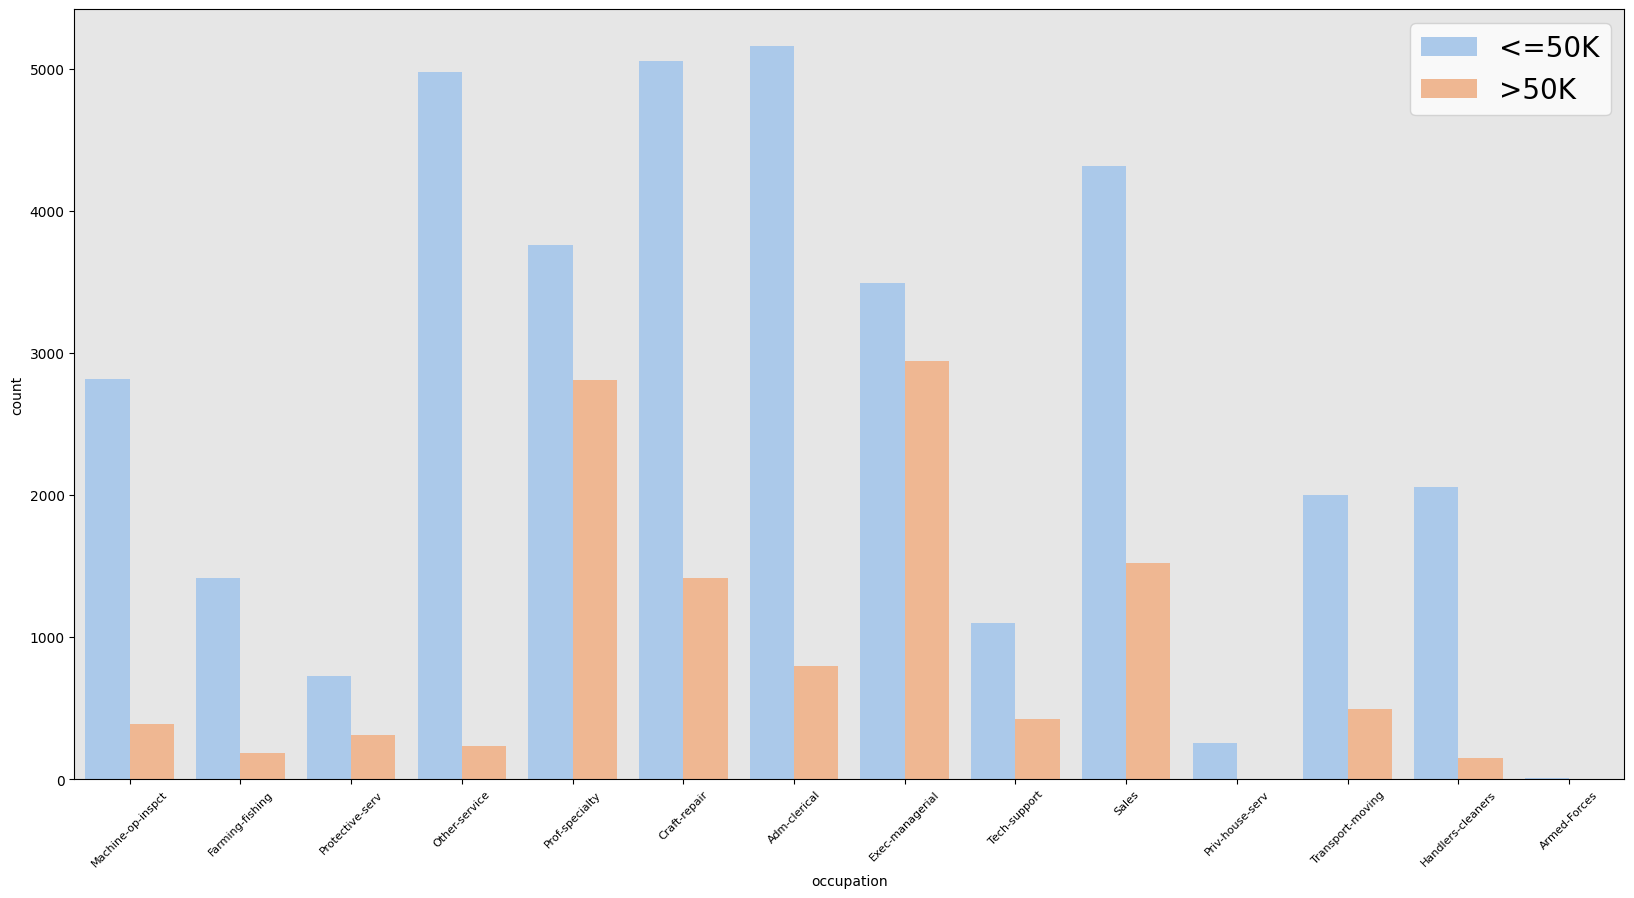

In [74]:
draw_countplot(countplot_x='occupation', countplot_hue='income', countplot_data=df)

In [75]:
df['occupation'].value_counts()

occupation
Prof-specialty       6575
Craft-repair         6471
Exec-managerial      6435
Adm-clerical         5960
Sales                5840
Other-service        5215
Machine-op-inspct    3206
Transport-moving     2495
Handlers-cleaners    2203
Farming-fishing      1604
Tech-support         1527
Protective-serv      1040
Priv-house-serv       256
Armed-Forces           15
Name: count, dtype: int64

The occupation column provides insights into the diverse range of professions represented in the dataset. Here are some key observations:

**Dominant Occupations:**
Professional Specialties: "Prof-specialty" is the most common occupation, indicating a significant number of professionals in the dataset.

**Blue-Collar Jobs:** Occupations like "Craft-repair", "Machine-op-inspct", and "Handlers-cleaners" are also well-represented.

**Less Common Occupations:**
"Armed-Forces" and "Priv-house-serv" have relatively low frequencies, suggesting a smaller number of individuals in these occupations.

# Relationship Data Analysis

The relationship column provides information about the individual's relationship to the head of household. 
The most common relationship is "Husband," followed by "Not-in-family" and "Own-child."

In [76]:
# It looks similar to the Marital Status column, but it doesn't represent exactly the same thing.

df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

# Race Data Analysis

The race column provides information about the racial identity of individuals. 
The most common race in the dataset is "White," followed by "Black" and "Asian-Pac-Islander."

In [77]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

# Count Plot for Race Distribution

<Axes: xlabel='race', ylabel='count'>

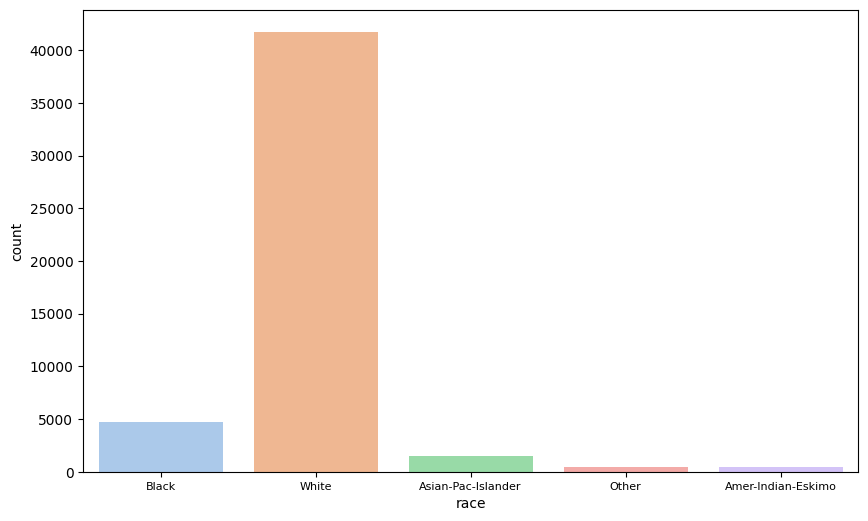

In [78]:
sns.countplot(data=df, x='race')

# Gender Data Analysis

gender  income
Female  <=50K     14423
        >50K       1769
Male    <=50K     22732
        >50K       9918
Name: income, dtype: int64
------------------------------------------------


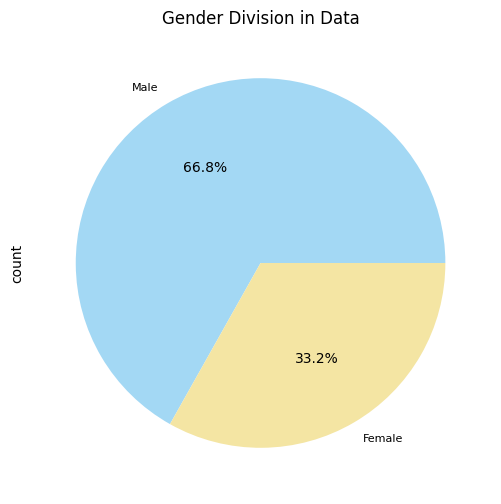

<Figure size 1000x600 with 0 Axes>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

sex_income = pd.DataFrame({'gender': df['gender'], 'income': df['income']})
data = sex_income.income.groupby([sex_income.gender, sex_income.income]).size()

plt.title('Gender Division in Data')
print(data)
print('------------------------------------------------')


df['gender'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['#A3D8F4', '#F4E5A3']  
)

plt.figure(figsize=(10,6))
plt.show()

This table shows the count (frequency) of individuals in each income category (<=50K and >50K) for both genders (Female and Male). 
We can observe that:

More Males in Total: There are more males (22732 + 9918) than females (14423 + 1769) in the dataset.

Income Disparity:

Females: A higher proportion of females earn less than or equal to $50K (14423) compared to those earning more than $50K (1769).

Males: The distribution of income is more balanced among males, with a significant number in both income categories.

In [80]:
df.sample(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
23884,35,Private,196491,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
5676,45,Private,256367,12th,8,Divorced,Farming-fishing,Not-in-family,Black,Male,0,0,40,United-States,<=50K


# Capital Gain and Capital Loss Data Analysis

In [81]:
print(df['capital-gain'].value_counts())

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64


The output shows the distribution of capital gains among individuals. 
The vast majority (44,807) have no capital gain (0).
A smaller number of individuals have significant capital gains, with 99,999 being the highest.

In [82]:
print(df['capital-loss'].value_counts())

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: count, Length: 99, dtype: int64


Similarly, the distribution of capital losses shows that most individuals (46,560) have not experienced any capital loss. A smaller number have incurred losses, with values ranging from 1 to 1977.

# Hours Per Week Data Analysis

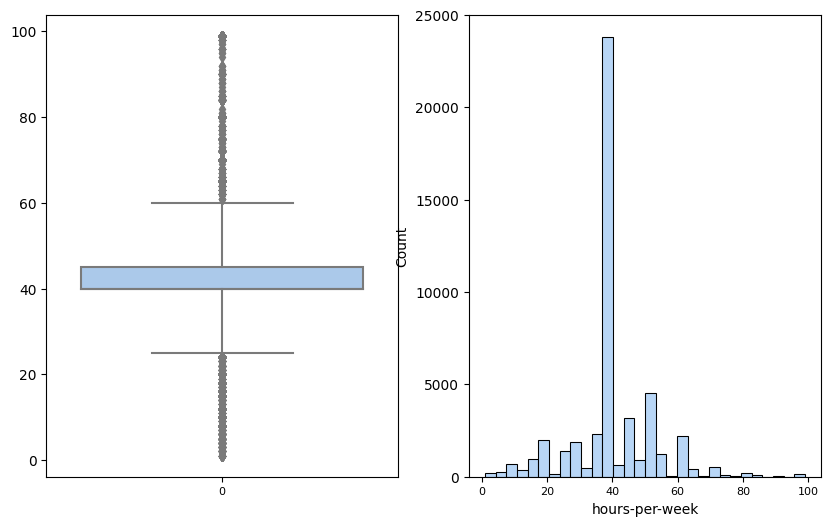

In [83]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df["hours-per-week"],whis=3)
plt.subplot(1,2,2)
sns.histplot(data=df["hours-per-week"],bins=30);

The median number of hours worked per week is around 40.
The first quartile (Q1) is around 30, and the third quartile (Q3) is around 50.

In [84]:
df[df["hours-per-week"] > 80]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25,45,Self-emp-not-inc,432824,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
309,51,Self-emp-not-inc,136708,HS-grad,9,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,3103,0,84,Vietnam,<=50K
354,32,Private,224462,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,84,United-States,>50K
384,29,Private,211208,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
723,35,Self-emp-not-inc,28987,9th,5,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,96,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48672,55,Private,199763,HS-grad,9,Separated,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,<=50K
48683,42,Private,288154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
48757,35,Private,30673,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,84,United-States,<=50K


From the filtered data, we can observe a few key points about individuals who work over 80 hours per week:

Diverse Occupations: Individuals in various occupations, including self-employed, craft-repair, transport-moving, and professional roles, work long hours.

Income Levels: While some individuals working over 80 hours per week earn more than $50K, others earn less. This suggests that long hours alone do not guarantee high income.

# Native Countries Data Analysis

Key Observations:

Dominance of US Citizens: The vast majority of individuals in the dataset are US citizens, as indicated by the high count for "United-States".

Diverse Origins: The dataset includes individuals from a diverse range of countries, highlighting the multicultural nature of the population.

Notable Countries: Mexico, Philippines, Germany, and Puerto Rico are among the most frequently represented non-US countries.

In [85]:
print(df['native-country'].value_counts())

native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

# Count Plot for Native Countries

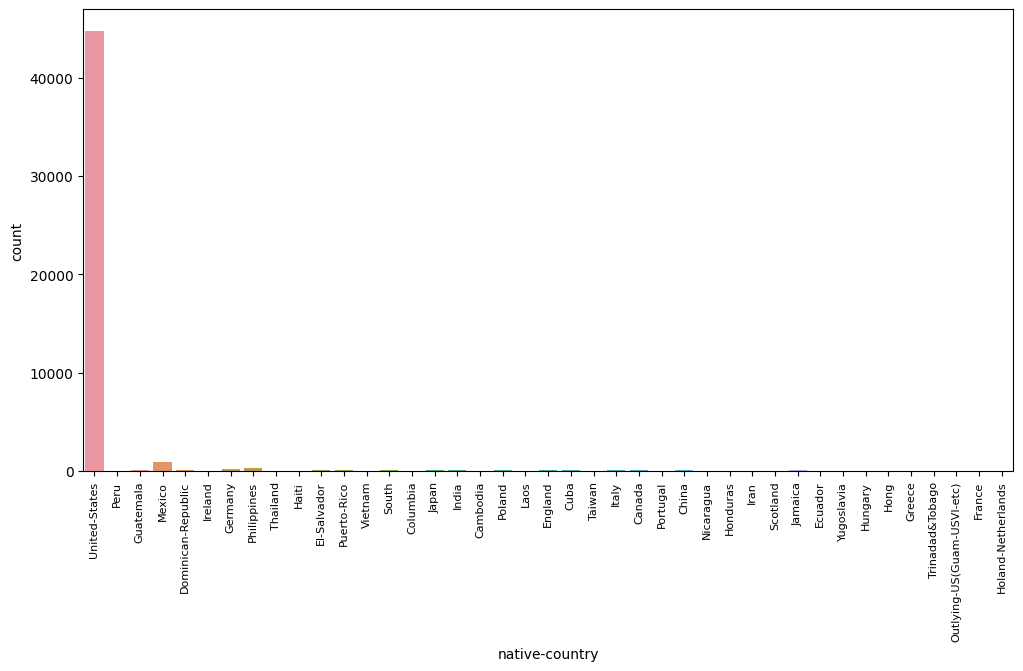

In [86]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='native-country')
plt.xticks(rotation=90)  
plt.show()

# countries can be grouped or eliminated

Grouping Countries: You can group similar or neighboring countries into a single category. This can be done based on geographic region (e.g., "Central America"), economic development level (e.g., "Developed Countries"), or any other relevant criteria.

Eliminating Countries: If certain countries have very low counts, you can eliminate them from the plot to focus on the more prominent ones. Here are some approaches:

# Data Transformation

In [87]:
df['native-country'] = df['native-country'].apply(lambda x: 'Others' if x != 'United-States' else x)

The value_counts() output shows that the dataset is now primarily divided into two categories: "United-States" and "Others." This simplification can be useful for certain analyses, especially when focusing on the distinction between US citizens and non-US citizens.

In [88]:
print(df['native-country'].value_counts())

native-country
United-States    44689
Others            4153
Name: count, dtype: int64


# Box Plot for the Numerical Attributes

A boxplot is a standardized way to visually display data based on five-number summaries: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It helps identify outliers and the spread of the data.

Age:

Median Age: The median age appears to be around 37-38 years.

Outliers: There are some outliers on the higher end, indicating individuals who are significantly older than the majority.

fnlwgt:

Outliers: There are numerous outliers on the higher end, suggesting that the fnlwgt variable has a long right tail.

Capital-gain:

Outliers: The presence of outliers on the higher end indicates that a few individuals have experienced substantial capital gains.
Capital-loss:

Outliers: Similar to capital gain, there are outliers on the higher end, suggesting significant capital losses for a few individuals.

Educational-num:

Distribution: The data is relatively concentrated, with a few outliers on the higher end. This indicates that most individuals have a similar level of education.

Hours-per-week:

Outliers: There are outliers on both the higher and lower ends, suggesting that some individuals work significantly more or fewer hours than the typical range.

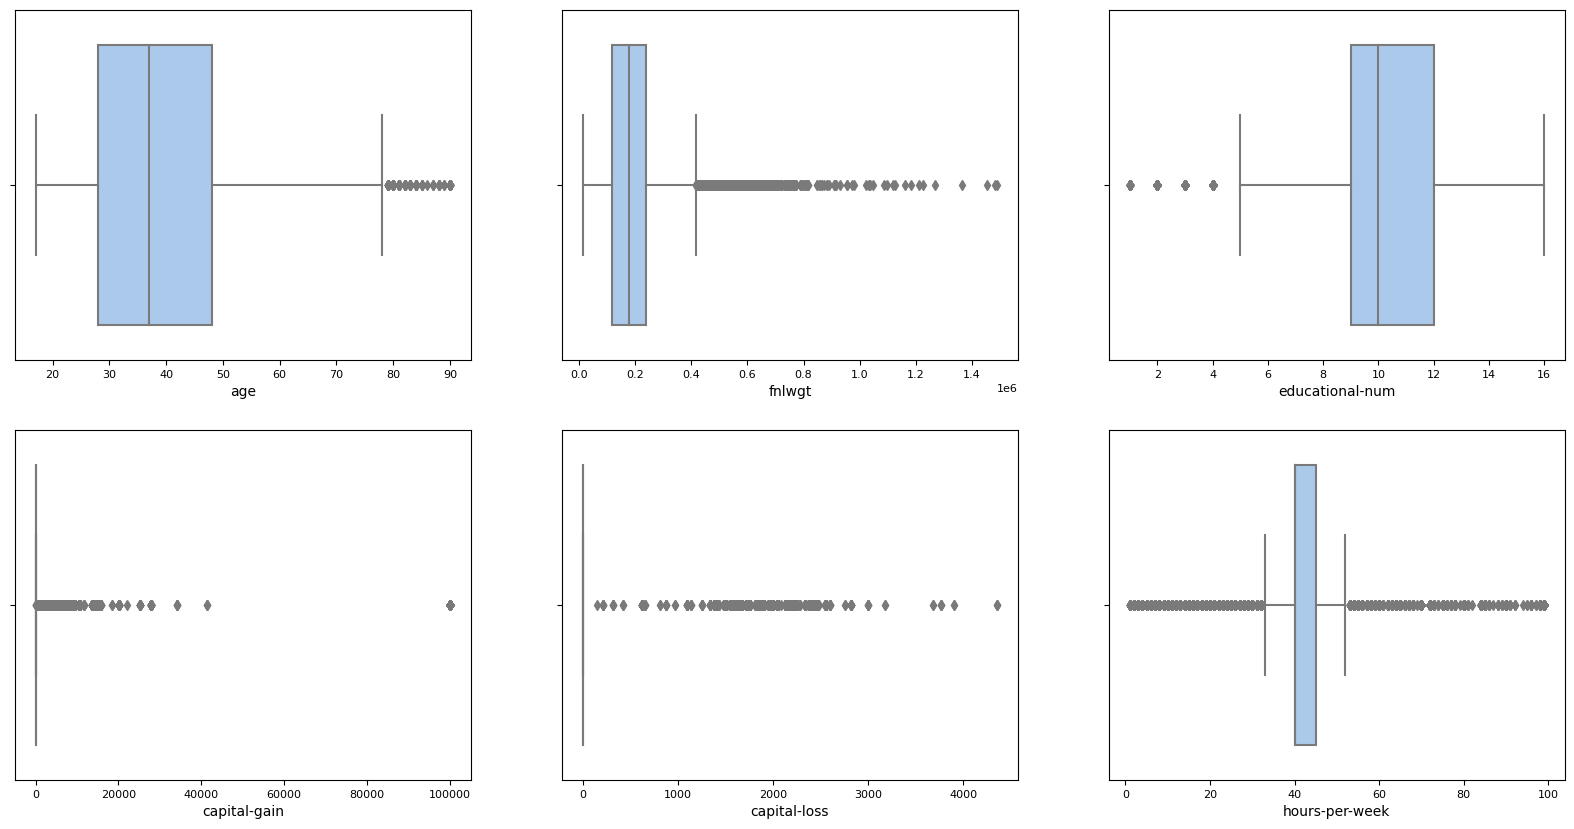

In [90]:
index=0
plt.figure(figsize=(20,10))
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(2,3,index)
    sns.boxplot(x=feature,data=df,whis=1.5)

# Correlation Heatmap

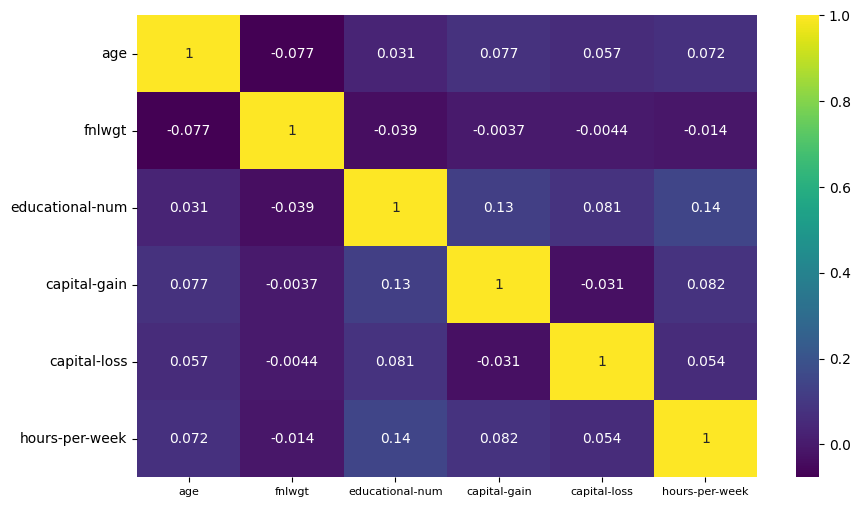

In [91]:
df_numeric = df.select_dtypes(include="number")
sns.heatmap(df_numeric.corr(), annot=True,  cmap="viridis");

Positive Correlation:

educational-num and capital-gain have a moderate positive correlation, suggesting that individuals with higher 
education tend to have higher capital gains.

educational-num and hours-per-week also show a moderate positive correlation, indicating that individuals with higher education might work more hours.

# Pairplot for the Numerical Variables

A pairplot is a powerful visualization tool that allows us to explore relationships between pairs of numerical variables in a dataset. In this case, the pairplot is further enhanced by the hue="income" parameter, which adds color coding based on the income level (<=50K or >50K).

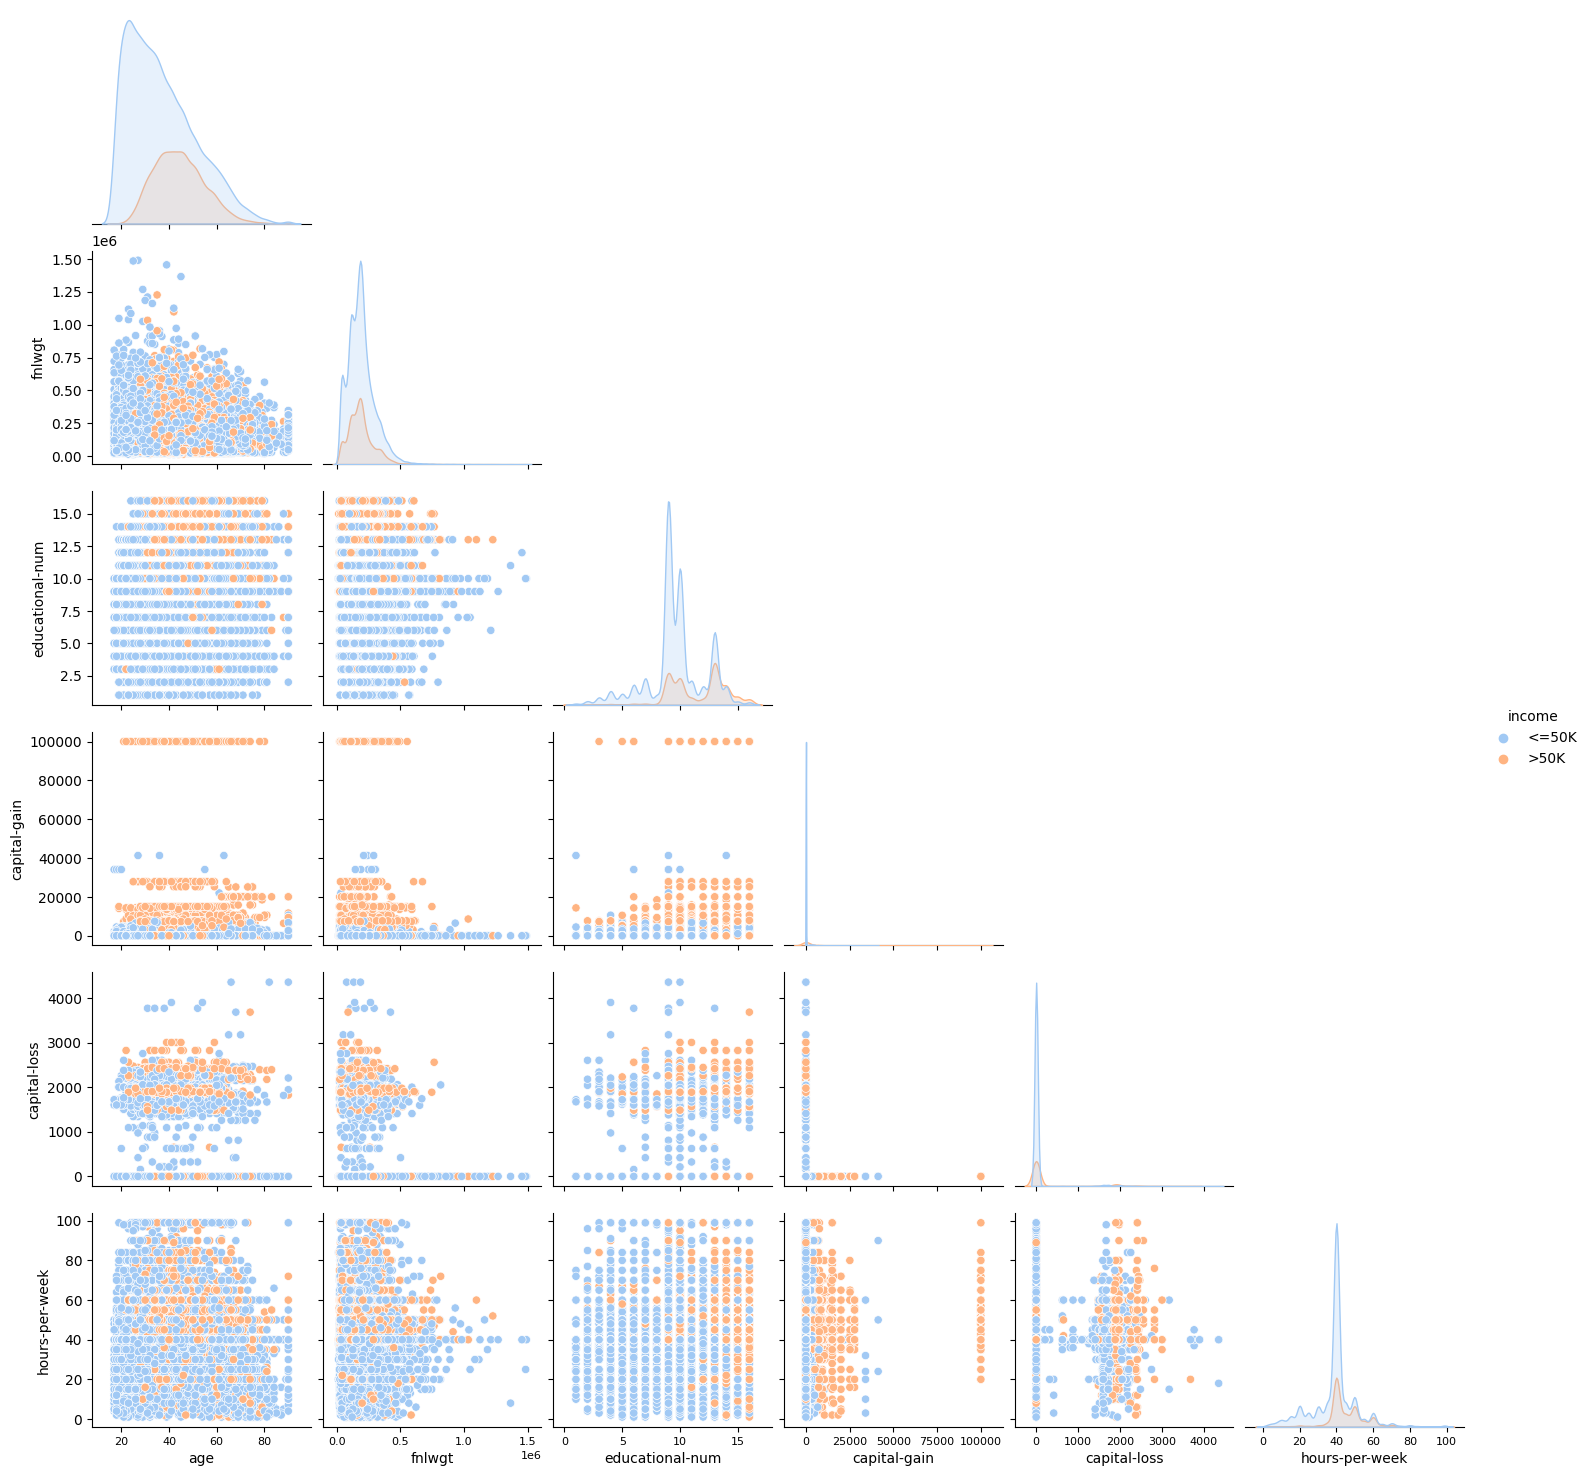

In [92]:
sns.pairplot(df, hue="income", corner=True);



Distribution of Numerical Variables:

Age: The distribution of age is right-skewed, with a peak around 30-40 years.

fnlwgt: This variable appears to have a wide range of values, with some outliers.

Educational-num: The distribution is relatively concentrated, with most individuals having a moderate level of education.

Capital-gain: The distribution is highly skewed, with a few individuals having very high capital gains.

Capital-loss: Similar to capital-gain, the distribution is skewed, with a few individuals having significant capital losses.

Hours-per-week: The distribution is roughly bell-shaped, with a peak around 40 hours per week.

Relationships Between Variables:

Age and Income: There seems to be a weak positive correlation between age and income. Older individuals tend to have higher incomes.

Education and Income: There's a positive correlation between education level and income. Higher education levels are associated with higher incomes.

Capital Gains/Losses and Income: Individuals with higher capital gains or lower capital losses are more likely to have higher incomes.

Hours-per-week and Income: There's a weak positive correlation between hours worked per week and income. However, the relationship is not very strong, suggesting that other factors might play a more significant role in determining income.

Income Disparity:

The color coding based on income level helps visualize the income disparity across different variables. For example, individuals with higher capital gains and more education tend to have higher incomes.

# Pie Chart for Income

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


<Axes: ylabel='count'>

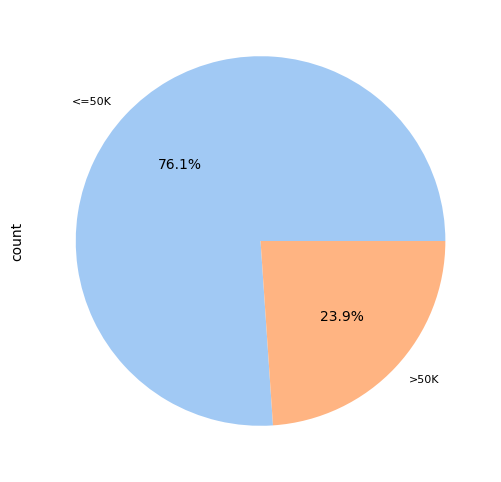

In [93]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

# classes in target are unbalanced

Key Take aways:

Dominance of Lower Income: The majority of individuals in the dataset (76.1%) have an income of less than or equal to $50K per year.

Minority of Higher Income: A smaller proportion (23.9%) of individuals earn more than $50K per year.

In [94]:
df.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,2,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,6575,19716,41762,32650,44689,37155


In [95]:
# 
df['income'] = df['income'].map({"<=50K": 0, ">50K": 1})

The code essentially converts the categorical variable income into a numerical variable. This is a common preprocessing step in machine learning, as many algorithms require numerical input.

# Analyzing the Data Split and Feature Engineering

The data is rightly splited into training and testing sets using train_test_split. 
The test_size=0.10 parameter indicates that 10% of the data will be used for testing, while the remaining 90% will be used for training. 
The stratify=y parameter ensures that the class distribution (income levels) is preserved in both the training and testing sets.

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = df.drop(["income"], axis=1)
y = df["income"]

In [98]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [99]:
# I separate categorical and numerical features

categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']
numeric_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.10,
                                                    stratify=y,
                                                    random_state=101)

# Modelling

# Logistic Regression Model to predict Income Levels

This pipeline effectively handles both numerical and categorical features, ensuring that the model is trained on well-prepared data.

The GridSearchCV step further helps in finding the best hyperparameters for the Logistic Regression model, leading to improved performance.Pipeline: This class from sklearn.pipeline allows you to chain preprocessing steps with the final estimator (Logistic Regression in this case) into a single unit. 

ColumnTransformer: This transformer from sklearn.compose applies different preprocessing techniques to different feature groups (numerical and categorical) in your data.

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [104]:
lr_pipeline = Pipeline([
    ('preprocessor',
     ColumnTransformer(
         transformers=[('num', StandardScaler(), numeric_features),
                       ('cat',
                        OneHotEncoder(),
                        categorical_features)])),
    ('logistic', LogisticRegression()) #max_iter=1000
])

StandarScaler (Numerical Features): This transformer scales numerical features (age, education level, etc.) to have a mean of 0 and a standard deviation of 1. This can improve the performance of Logistic Regression, which is sensitive to feature scales.

OneHotEncoder (Categorical Features): This transformer encodes categorical features (workclass, education, etc.) into one-hot encoded vectors. Each category is represented by a new feature with a value of 1 if the data point belongs to that category and 0 otherwise. This allows Logistic Regression to handle categorical features effectively. 

In [105]:
# pipeline FOR Logistic Regression

lr_pipeline = Pipeline([
    ('preprocessor',
     ColumnTransformer(
         transformers=[
             ('num', StandardScaler(), numeric_features),
             ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
         ]
     )
    ),
    ('logistic', LogisticRegression())  # max_iter=1000
])
#  parameter grid

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10)
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]

lr_param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    #'logistic__C': C,
    #'logistic__solver': solver,
    'logistic__max_iter': [500, 1000],
    'logistic__random_state': [101],
    # 'logistic__penalty': penalty,
    'logistic__class_weight': class_weight
}

# GridSearchCV
lr_grid_search = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    scoring = "accuracy",
    n_jobs=-1,
    cv=10)
lr_grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__max_iter': [500, 1000],
                         'logistic__random_state': [101]},
             scoring='accuracy')

handle_unknown='ignore': This parameter in the OneHotEncoder instructs it to ignore unseen categories during training, which can be useful for handling potential new categories in unseen data.

LogisticRegression from sklearn.linear_model: This is the core estimator used for binary classification. It learns a linear relationship between the features and the target variable (income)

GridSearchCV from sklearn.model_selection: This class is used to perform an exhaustive search over a predefined set of hyperparameter values for the Logistic Regression model. It trains the model with different hyperparameter combinations and identifies the one that achieves the best performance on the training data using the specified scoring metric (accuracy in this case).

lr_param_grid: This dictionary defines the set of hyperparameters to be explored by GridSearchCV. Here's what each parameter controls:
logistic__C: Regularization strength. Higher values can reduce overfitting but might also decrease model flexibility.
logistic__max_iter: Maximum number of iterations for the solver.
logistic__random_state: Controls random seed for reproducibility.
logistic__class_weight: Class weights to address class imbalance. "balanced" can be useful for the imbalanced income dataset.



In [106]:
lr_grid_search.best_params_

{'logistic__C': 1,
 'logistic__class_weight': None,
 'logistic__max_iter': 500,
 'logistic__random_state': 101}

The GridSearchCV has determined that a Logistic Regression model with these specific hyperparameter settings performs best on the given dataset. This model will likely have a good balance between bias and variance, and it should generalize well to unseen data.

In [107]:
lr_grid_search.best_score_ #0.8513128650434856

0.8505127114213872

The best_score_ attribute of the GridSearchCV object provides the best cross-validation score achieved by the model with the optimal hyperparameters. 
In this case, the best cross-validation accuracy is 0.8513128650434856.

In [108]:
y_pred = lr_grid_search.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

The output y_pred = array([0, 0, 0, ..., 0, 0, 0]) indicates that the model is predicting that all instances in the test set belong to the negative class (i.e., income <= 50K). This is a clear sign of model failure.

In [109]:
#eval metrics:

from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

# Understanding the eval_metric Function

This Python function evaluates the performance of a machine learning model on both the training and testing sets. It calculates various metrics to assess the model's accuracy and reliability.

Prediction:

y_train_pred = model.predict(X_train): Predicts the target variable for the training data.
y_pred = model.predict(X_test): Predicts the target variable for the testing data.
Evaluation:

Confusion Matrix: Calculates the number of true positive, true negative, false positive, and false negative predictions.
Classification Report: Provides a detailed summary of the model's performance, including precision, recall, F1-score, and accuracy for each class.

In [111]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Key Metrics:

Accuracy: Overall, how often is the model correct?
Precision: Of the positive predictions, how many are actually positive?
Recall: Of all the positive cases, how many did the model correctly identify?
F1-score: A harmonic mean of precision and recall.
Support: The number of samples in each class.

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for a specific problem. It is a table with 2 rows and 2 columns that report the number of correct and incorrect predictions.   

Key Metrics:

Accuracy: Overall, how often is the model correct?
Precision: Of the positive predictions, how many are actually positive?
Recall: Of all the positive cases, how many did the model correctly identify?
F1-Score: A harmonic mean of precision and recall.
Support: The number of samples in each class.

In [112]:
eval_metric(lr_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[3481  235]
 [ 499  670]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3716
           1       0.74      0.57      0.65      1169

    accuracy                           0.85      4885
   macro avg       0.81      0.75      0.78      4885
weighted avg       0.84      0.85      0.84      4885


Train_Set
[[31130  2309]
 [ 4243  6275]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     33439
           1       0.73      0.60      0.66     10518

    accuracy                           0.85     43957
   macro avg       0.81      0.76      0.78     43957
weighted avg       0.84      0.85      0.85     43957



Test Set:

Accuracy: The model is correct 85% of the time.
Precision for Class 0: 87% of the predictions for class 0 are correct.
Recall for Class 0: 94% of the actual class 0 instances are correctly predicted.
Precision for Class 1: 74% of the predictions for class 1 are correct.
Recall for Class 1: 57% of the actual class 1 instances are correctly predicted.
Train Set:

Accuracy: The model is correct 85% of the time.
Precision for Class 0: 88% of the predictions for class 0 are correct.
Recall for Class 0: 93% of the actual class 0 instances are correctly predicted.
Precision for Class 1: 73% of the predictions for class 1 are correct.
Recall for Class 1: 60% of the actual class 1 instances are correctly predicted.
Observations:

Model Performance: The model performs reasonably well on both the training and test sets.
Class Imbalance: The dataset seems to be imbalanced, with more instances of class 0 than class 1. This might impact the model's performance, especially for the minority class.
Overfitting: The model's performance on the training set is slightly better than on the test set, which might indicate some overfitting.

In [113]:
eval_metric(lr_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[3481  235]
 [ 499  670]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3716
           1       0.74      0.57      0.65      1169

    accuracy                           0.85      4885
   macro avg       0.81      0.75      0.78      4885
weighted avg       0.84      0.85      0.84      4885


Train_Set
[[31130  2309]
 [ 4243  6275]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     33439
           1       0.73      0.60      0.66     10518

    accuracy                           0.85     43957
   macro avg       0.81      0.76      0.78     43957
weighted avg       0.84      0.85      0.85     43957



# Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for a specific problem. It is a table with 2 rows and 2 columns that report the number of correct and incorrect predictions.   

Key Metrics:

True Positive (TP): Correctly predicted positive cases.
True Negative (TN): Correctly predicted negative cases.
False Positive (FP): Incorrectly predicted as positive (Type I error).
False Negative (FN): Incorrectly predicted as negative (Type II error).

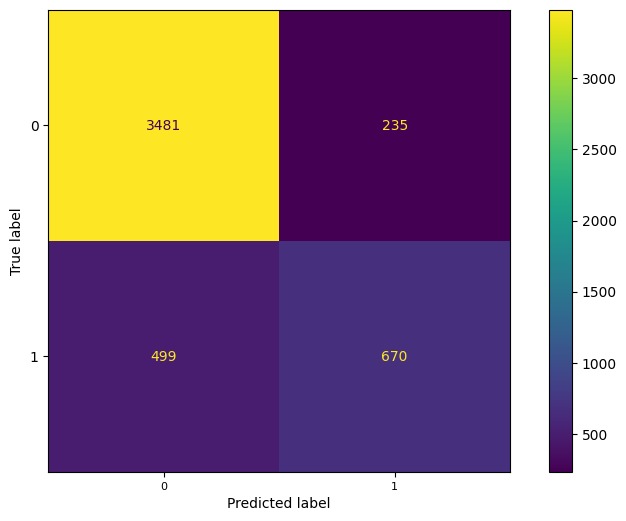

In [114]:
ConfusionMatrixDisplay.from_estimator(lr_grid_search, X_test, y_test);

Based on the given confusion matrix, we can interpret the results as follows:

True Positives (TP): 670 instances were correctly classified as positive (income > 50K).
True Negatives (TN): 3481 instances were correctly classified as negative (income <= 50K).
False Positives (FP): 235 instances were incorrectly classified as positive.
False Negatives (FN): 499 instances were incorrectly classified as negative.

# ROC Curve

A Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold

 is varied. It plots the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold settings.   



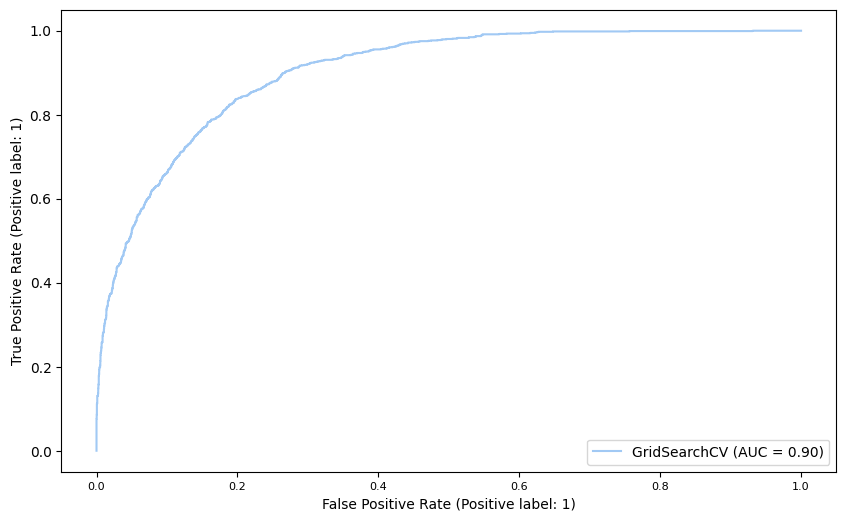

In [117]:
RocCurveDisplay.from_estimator(lr_grid_search, X_test, y_test);

The provided ROC curve shows a relatively strong performance for the model. Here's a breakdown of its key features:

AUC (Area Under the Curve): An AUC of 0.90 indicates that the model has good discriminatory power. A higher AUC generally implies a better model.
True Positive Rate (TPR) or Sensitivity: This measures the proportion of actual positive cases that are correctly identified by the model.
False Positive Rate (FPR) or Specificity: This measures the proportion of actual negative cases that are incorrectly identified as positive.

In [116]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve

# Precision Curve

A Precision-Recall curve is a plot of precision against recall for different probability thresholds. It's particularly useful when dealing with imbalanced datasets, where accuracy might not be the best metric.

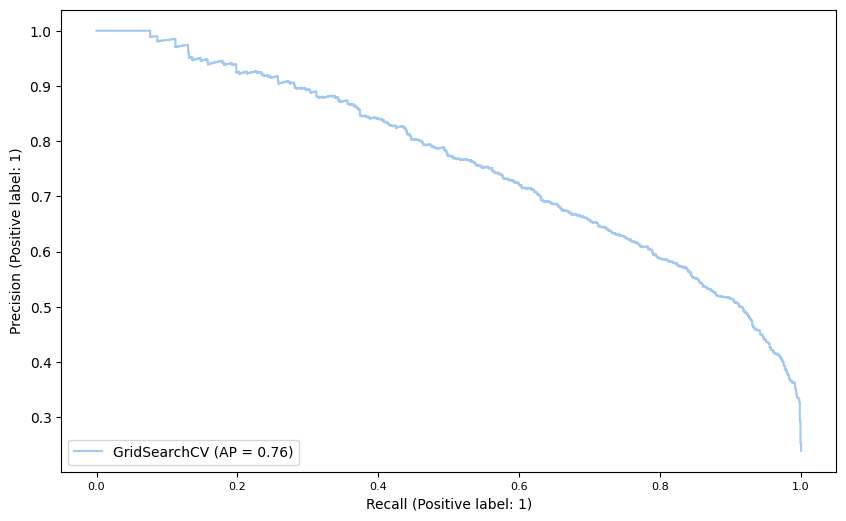

In [118]:
# I should check Precision Recall because it is an unbalanced dataset
PrecisionRecallDisplay.from_estimator(lr_grid_search, X_test, y_test);

In the curve above we have a Precision-Recall curve with an Average Precision (AP) of 0.76. Here's what this means:

Precision: This measures the proportion of positive predictions that are actually correct. A higher precision indicates fewer false positives.
Recall: This measures the proportion of actual positive cases that are correctly identified. A higher recall indicates fewer false negatives.
Key Observations:

Trade-off between Precision and Recall: As precision increases, recall tends to decrease, and vice versa. This is a common trade-off in classification models.
AP Score: The Average Precision (AP) score is a measure of the model's performance across different threshold settings. An AP of 0.76 indicates reasonable performance, but there's room for improvement.
Potential Improvements:

Data Quality: Ensure that the data is clean, accurate, and free from biases.
Feature Engineering: Create informative features that capture relevant patterns and improve the model's ability to discriminate between classes.
Hyperparameter Tuning: Experiment with different hyperparameter values to optimize the model's performance.
Model Selection: Consider using different algorithms like Random Forest, XGBoost, or Support Vector Machines.
Class Imbalance: If the dataset is imbalanced, techniques like oversampling, undersampling, or class weighting can be used to improve the model's